# Sympy initiation and dynamic system definition
In the next block, necessary modules are called and dynamic system is defined by its kinetic and potential energy.

In [1]:
from sympy import *
from sympy.physics.mechanics import *

mechanics_printing(pretty_print=True)

t=Symbol('t')
m_1,m_2,l_m,l_M,k,l,c,u_0,Omega = symbols('m_1,m_2,l_m,l_M,k,l,c,u_0,Omega',positive=True)

g=Symbol('g',positive=True)

x, phi = dynamicsymbols('x_1,phi')

q=[x,phi]
u=[x.diff(t),phi.diff(t)]
Y=q+u



x_2=x+l*sin(phi)
y_2=l*cos(phi)

v_2=sqrt((x_2.diff(t)**2+y_2.diff(t)**2))
T=(m_1*x.diff(t)**2)/2+(m_2*v_2**2)/2
V=-m_2*g*y_2+(k*(x-u_0*sin(Omega*t))**2)/2

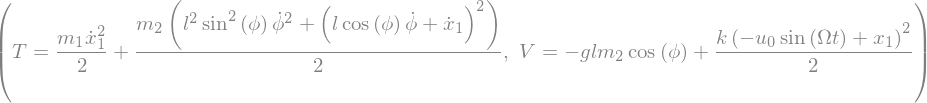

In [2]:
Eq(Symbol('T'),T),Eq(Symbol('V'),V)

# System Lagrangian
Lagrange function is given by the difference of kinetic and potential energy

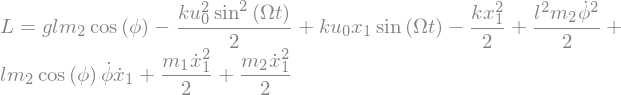

In [3]:
L=T-V #Lagrange function
Eq(Symbol('L'),L.expand().simplify())

# Determining of the governing equations
In order to obtain equations of motion, the Lagrangian Mechanics was applied. Reduction of the differential equations system allows to obtain the state space equations of the dynamic system. The right hand sides of system under consideration were found in this way.

### First method
Direct differentiation of the Lagrange function \(L\)

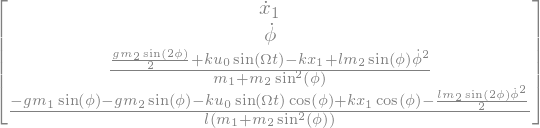

In [4]:
L_mat=Matrix([L.expand().doit().simplify()]) # matrix form of the scalar function L which enables .jacobian() method - (1x1) matrix
eoms=(L_mat.jacobian(u).diff(t) - L_mat.jacobian(q)).T
eoms_rhs=solve(eoms,Matrix(q).diff(t,t))

state_space=Matrix(u+[eoms_rhs[comp] for comp in Matrix(q).diff(t,t)])

ode_rhs=state_space.expand().applyfunc(simplify) #Determine the right hand sides of the govergning equations in order to use it for solve_ivp() integrating procedure. This function solves the initial value problem with utilization of numerical algorithms (as RK45 ord LSODA) implemented within scipy module
ode_rhs



### Second method
Application of the LagrangesMethod class.

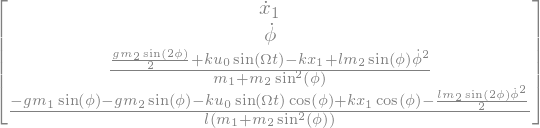

In [5]:
LM=LagrangesMethod(L.expand().simplify().doit(),q)
eqns=LM.form_lagranges_equations()

LM.rhs().expand().applyfunc(simplify) #do nothing, just for the testing purposes

ode_rhs=LM.rhs().expand().applyfunc(simplify) #Determine the right hand sides of the govergning equations in order to use it for solve_ivp() integrating procedure. This function solves the initial value problem with utilization numerical algorithms of (as RK45 ord LSODA) implemented within scipy module
ode_rhs


# Numeriacal form of right hand sides of the equations of motion
In order to determine the numerical model, regular Python function has to be created.

In [6]:
import numpy as np #a library for the numerical computations

#dictionary (something like a list) with the given system parameters,there won't be possibility to change when the integrator (solving procedure) will be called; all of the system invariants might be declared here
case_data={}

# .subs() substitute the data to the equations
ode_rhs_num=ode_rhs.subs(case_data)

odes_numpy=lambdify( (t,Y,m_1,m_2,l,k,g,u_0,Omega),ode_rhs_num) #numerical form of rhs - creates an input for solver - sympy lambdify. It is regular Python function defined by the conversion of Sympy expresion to Python code
test_result=odes_numpy(60,range(4),2,4,8,10,10,20,10) #exemplary result computed in order to verify generated expression. Just for the testing purposes.

# initial conditons
y_0=[0,0,0,0]

t_span=np.linspace(0,7,350) #creates time span and assigns it to t_span variable. It is the list of the evalutation points where the solution will be calculated.



# Numerical simulations
Application of the appropriate integrating procedure enables to obtain a numerical solution of the sytem under consideration. The solve_ivp code from scipy.integrate module was used in this case.

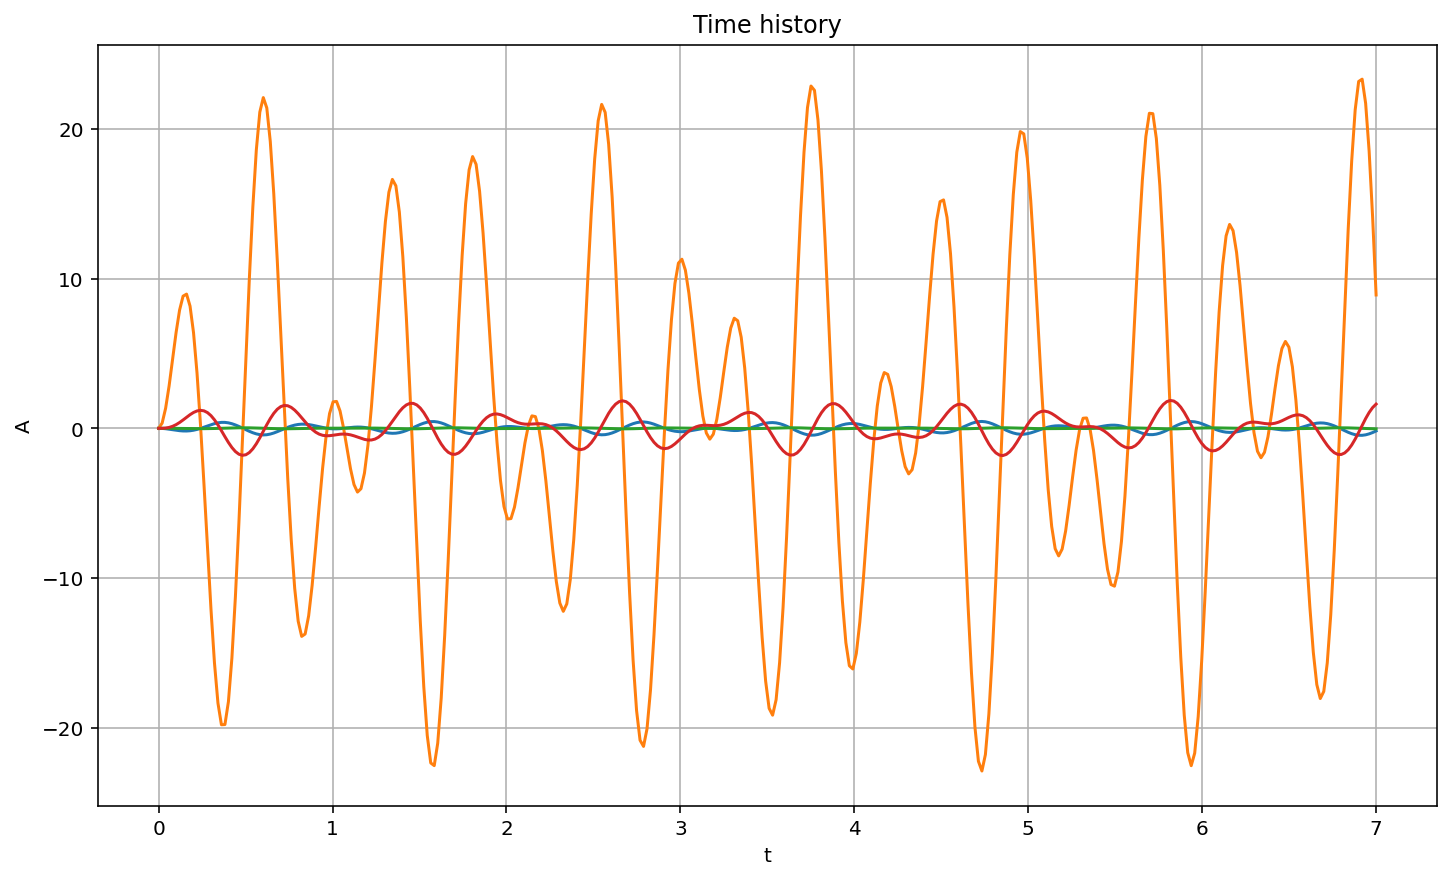

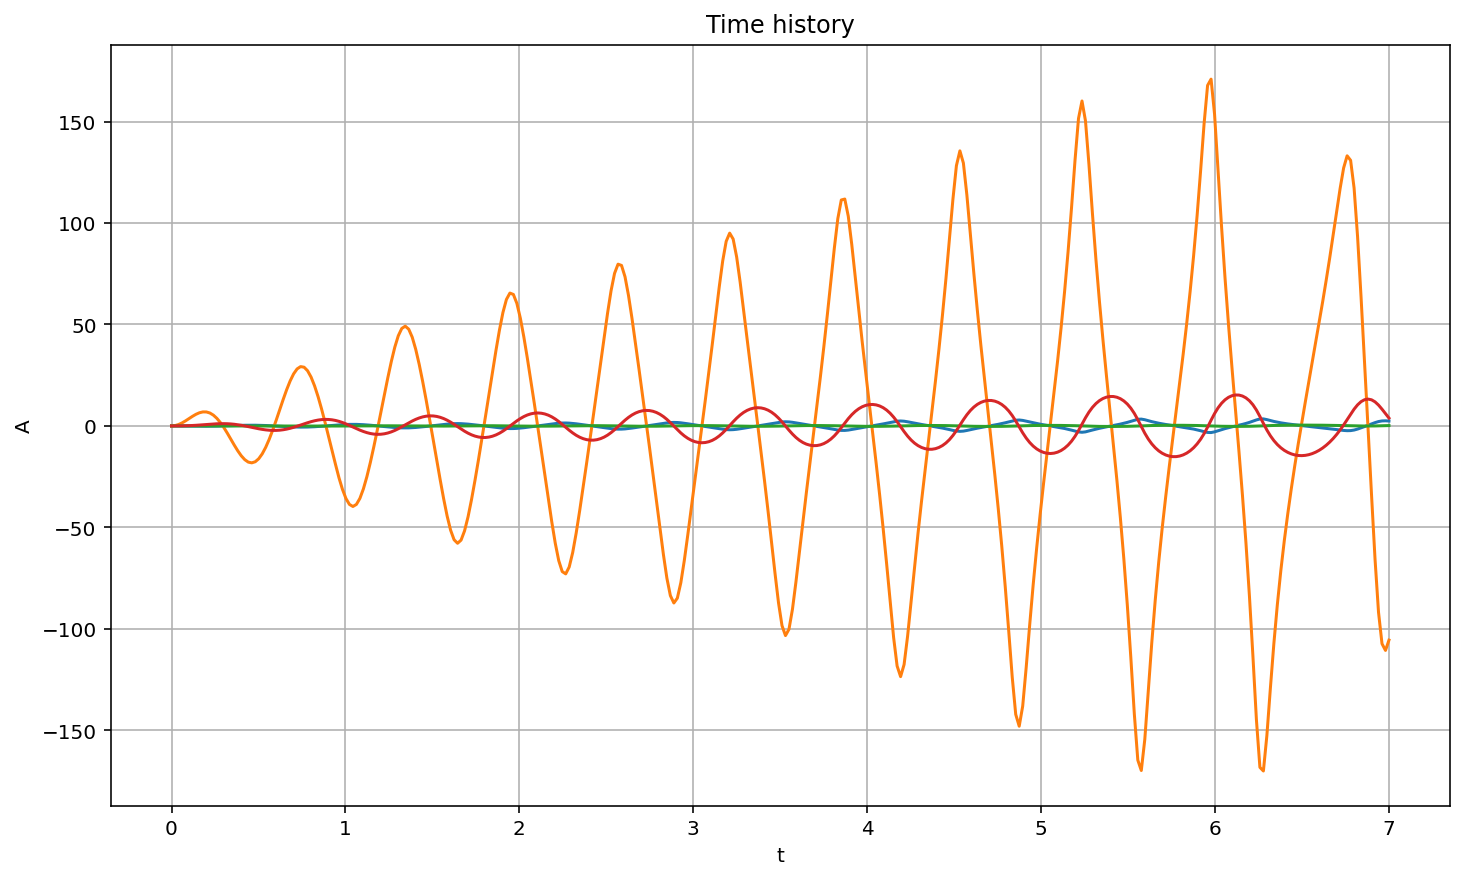

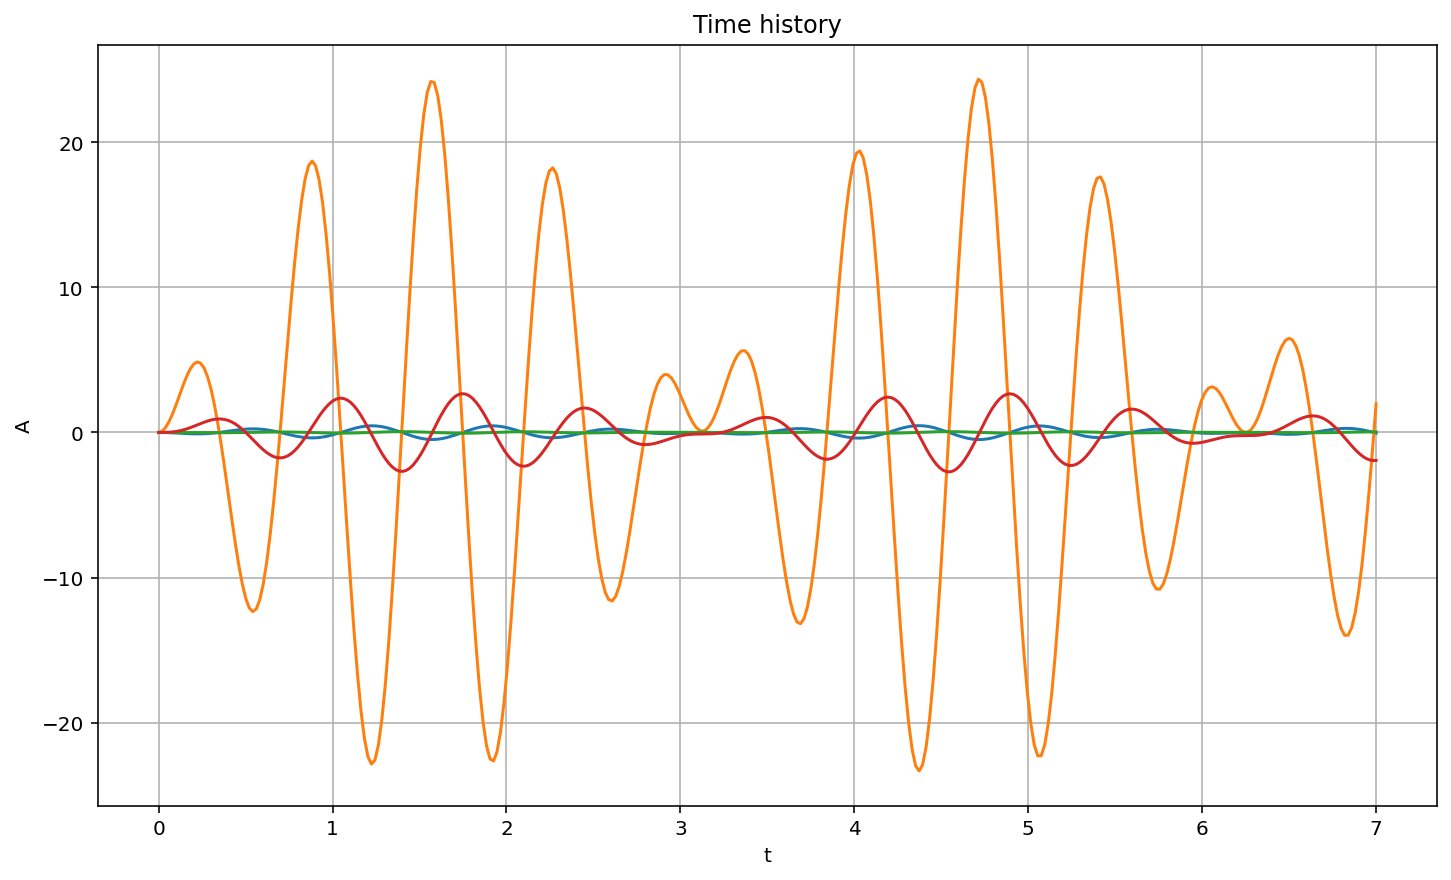

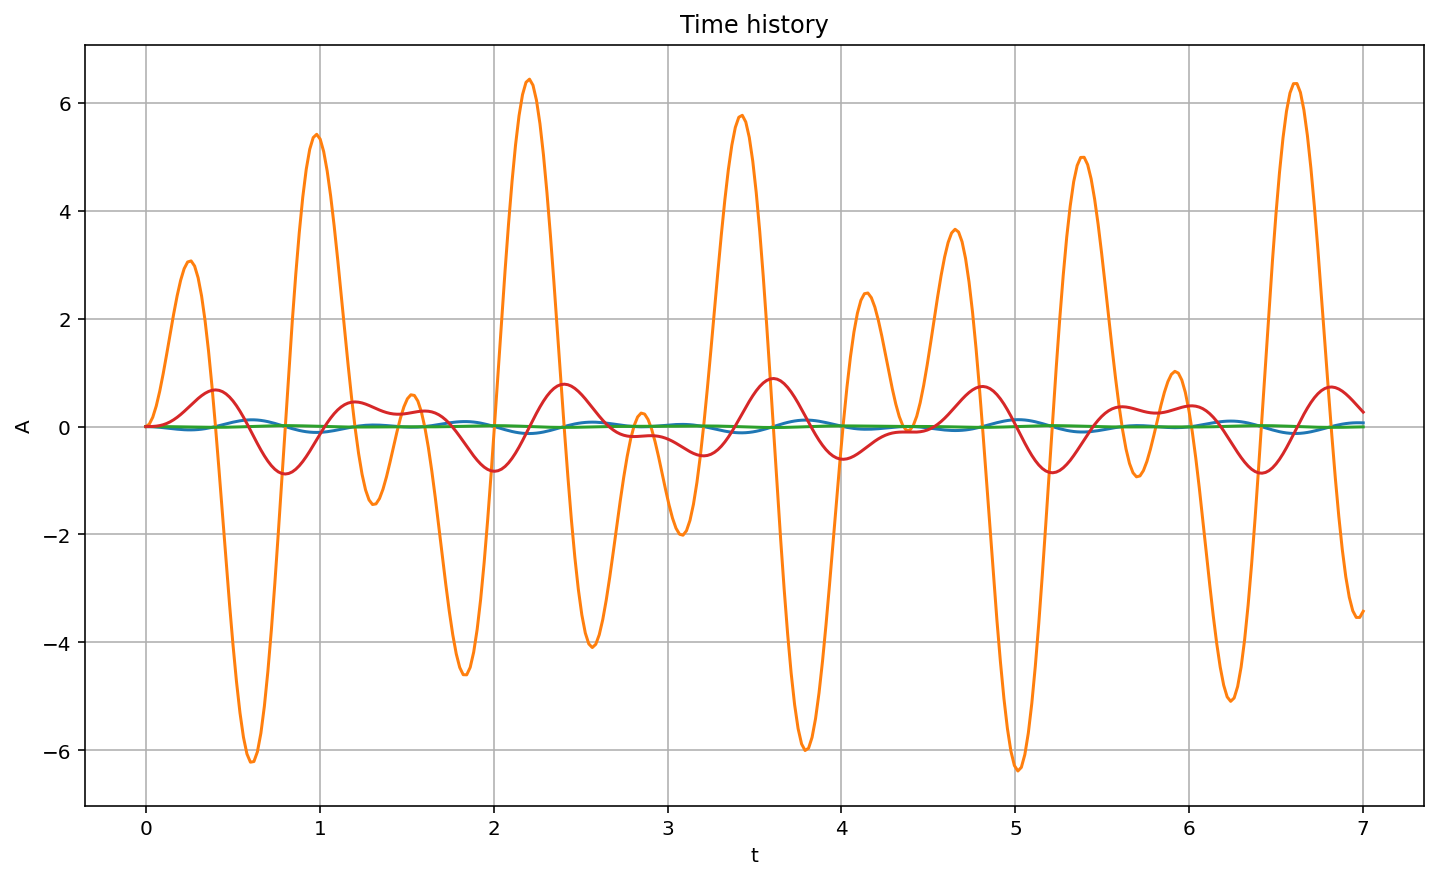

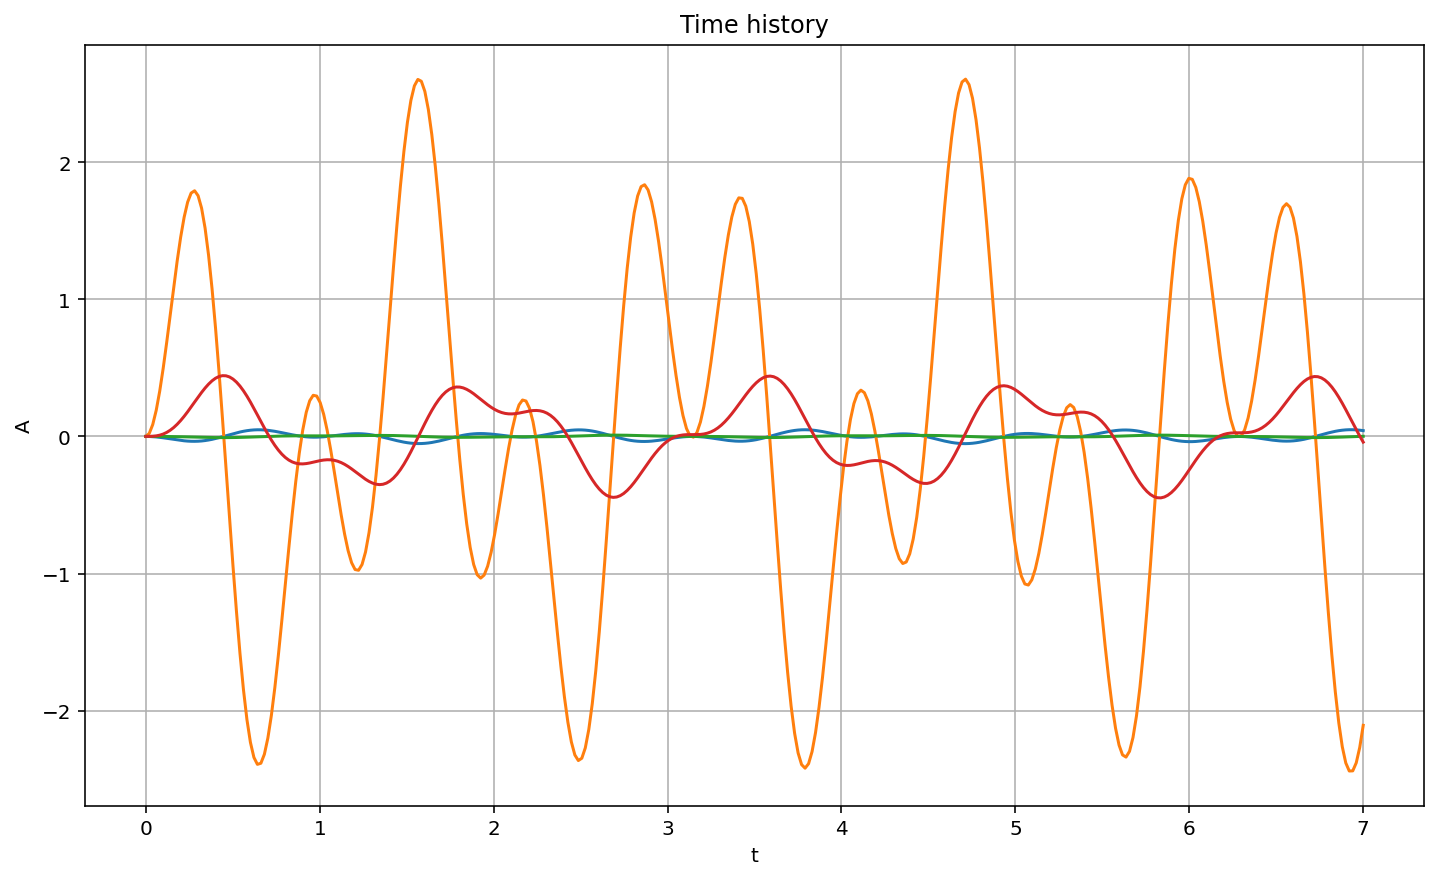

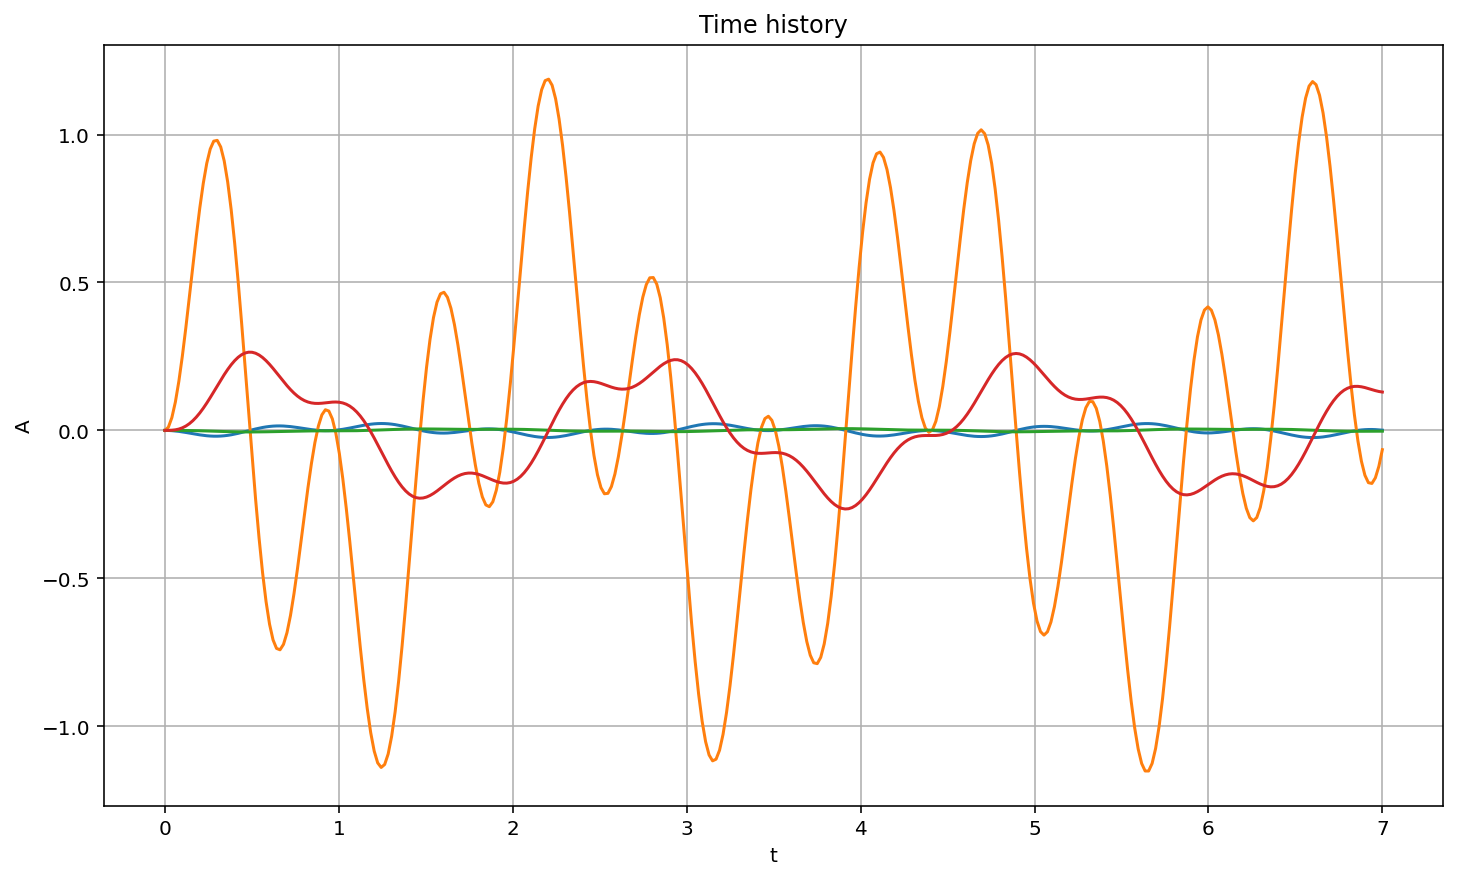

In [7]:
#importing the necessary libraries for integrating, ploting and data handling
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pd

#default values of the system parameters
m_1_num=100
m_2_num=150
l_num=50
k_num=1000
g_num=10
u_0_num=0.7
Omega_num=10



for m_1_num in [4,8,16,32,64,128]:
    y=integrate.solve_ivp(odes_numpy, [t_span[0],t_span[-1]],y_0,method='LSODA',vectorized=False,t_eval=t_span,args=(m_1_num,m_2_num,l_num,k_num,g_num,u_0_num,Omega_num)) #integrates the given system of the ODEs.
    
    plt.plot(y.t,y.y[3,:], y.t,y.y[2,:],y.t,y.y[1,:],y.t,y.y[0,:]) #plots the calculated solution
    
    plt.grid(True) #enables grid
    
    plt.xlabel("t") #shows the x axis label
    
    plt.ylabel("A") #shows the y axis label
    
    plt.title("Time history") #shows the plot name

    plt.show() #shows the scene with plots

    df_sol=pd.DataFrame(data=y.y.T,index=np.round(y.t,2)).round(3)#saves the results, The variable y.y is a matrix of computed values. The matrix y.y.T is transposition of t
    
    #version with labels
    df_sol=pd.DataFrame(data={'Y'+str(no):y.y[no,:] for no,key in enumerate(Y)},index=np.round(y.t,2)).round(3)#saves the results, The variable y.y is a matrix of computed values. The matrix y.y.T is transposition of t
    
    df_sol.to_csv('./DATA/results_'+str(m_1_num) +'.csv')

In [8]:
df_sol

Y0     Y1     Y2     Y3
0.00  0.000  0.000  0.000  0.000
0.02  0.000 -0.000  0.011 -0.000
0.04  0.001 -0.000  0.043 -0.001
0.06  0.002 -0.000  0.096 -0.002
0.08  0.005 -0.000  0.166 -0.003
...     ...    ...    ...    ...
6.92  0.142 -0.003 -0.177  0.003
6.94  0.138 -0.003 -0.179  0.003
6.96  0.134 -0.003 -0.160  0.003
6.98  0.132 -0.003 -0.121  0.002
7.00  0.130 -0.003 -0.065  0.001

[350 rows x 4 columns]